# Tabel of Contents <span class="tocSkip"></span>
<div class="toc">
  <ul class="toc-item">
    <li> <a href="#introduction">Introduction</a></li>
    <li> <a href="#data-inspection">Data Inspection</a></li>
    <ul>
      <li> <a href="#check-missing">Check for Missing Values</a></li>
      <li> <a href="#view_info">View Data Information</a></li>
      <li> <a href="#view_describe">View Data Describe</a></li>
    </ul>
    <li> <a href="#data-analysis">Data Analysis</a></li>
    <ul>
      <li> <a href="#average-salary-regions">Average Lower and Upper Salary by Region</a></li>
      <li> <a href="#average-rating-region">Average Rating by Region</a></li>
      <li> <a href="#Distribution of Job Listings by Region">Distribution of Job Listings by Region</a></li>
      <li> <a href="#sectors">Distribution of Sectors</a></li>
      <li> <a href="#easy-apply">Distribution of Easy Apply</a></li>
      <li> <a href="#top-20-job-titles">Top 20 Job Titles</a></li>
      <li> <a href="#top-20-salary">Top 20 Job Titles with Lower and Upper Salary Estimates</a></li>
      <li> <a href="#compay-size-salary">Company Size Vs. Salary</a></li>
      <li> <a href="#keywords-job-titles">Keywords of Job Titles</a></li>
      <li> <a href="#keywords-job-description">Keywords of Job Description</a></li>
    </ul>
  </ul>
</div>

# Introduction
<a name="introduction"></a>

With this dataset it is possible to hone the job search so that more people in need can find employment.

This dataset was created by picklesueat and contains more than 2500 job listings for data engineer positions, with features such as: Salary Estimate, Location, Company Rating, Job Description,and more.

Data Source: https://www.kaggle.com/datasets/andrewmvd/data-engineer-jobs/data

**Purpose:**

(1) **Average Lower and Upper Salary by Region:** Analyze and compare the average lower and upper salary ranges across different geographical regions to understand regional salary trends and disparities.

(2) **Average Rating by Region:** Evaluate and compare average job ratings across regions to identify areas where job satisfaction and employer reputation vary significantly.

(3) **Distribution of Job Listings by Region:** Investigate the distribution of job listings across regions to pinpoint areas of high demand and potential talent shortages.

(4) **Distribution of Sectors:** Explore the distribution of job sectors to highlight industries experiencing growth or contraction in hiring activities.

(5) **Distribution of Easy Apply:** Examine the prevalence of "Easy Apply" options in job listings to understand their impact on application rates and candidate experience.

(6) **Top 20 Job Titles:** Identify and rank the top 20 most frequently advertised job titles to reveal popular career paths and roles in demand.

(7) **Top 20 Job Titles with Lower and Upper Salary Estimates:** Provide detailed salary estimates for the top 20 job titles to help job seekers gauge earning potential in their desired roles.

(8) **Company Size Vs. Salary:** Analyze how company size influences salary offers to understand whether larger or smaller companies tend to offer more competitive compensation packages.

(9) **Keywords of Job Titles:** Extract and analyze keywords associated with job titles to uncover specific skills and qualifications most sought after by employers.

(1) **Keywords of Job Description:** Analyze job descriptions to identify common keywords and phrases that reflect the skills and responsibilities employers prioritize in candidates.


# Data Inspection
<a name="data-inspection"></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import plotly.graph_objs as go
import plotly.express as px
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud

In [28]:
data = pd.read_csv("DataEngineer.csv")
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


## Check for Missing Values
<a name="check-missing"></a>

In [29]:
data.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

##  View Data Information
<a name="view_info"></a>

In [30]:
data['Easy Apply'] = data['Easy Apply'].replace({'-1': False, 'TRUE': True})
data['Easy Apply']

0       False
1       False
2       False
3       False
4        True
        ...  
2523    False
2524    False
2525    False
2526    False
2527    False
Name: Easy Apply, Length: 2528, dtype: object

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Type of ownership  2528 non-null   object 
 10  Industry           2528 non-null   object 
 11  Sector             2528 non-null   object 
 12  Revenue            2528 non-null   object 
 13  Competitors        2528 non-null   object 
 14  Easy Apply         2528 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 296.4+ KB


##  View Data Describe
<a name="view_describe"></a>

In [32]:
data.describe()

,Rating,Founded
count,2528.000000,2528.000000
mean,3.379549,1534.771756
std,1.519254,830.525022
min,-1.000000,-1.000000
25%,3.300000,1864.000000
50%,3.800000,1990.000000
75%,4.100000,2003.000000
max,5.000000,2020.000000


# Data Analysis
<a name="data-analysis"></a>

## Average Lower and Upper Salary by Region
<a name="average-salary-regions"></a>

In [33]:
# Function to extract lower and upper salary bounds
def extract_salary_bounds(salary):
    match = re.search(r'\$(\d+)K-\$(\d+)K', salary)
    if match:
        lower = int(match.group(1)) * 1000
        upper = int(match.group(2)) * 1000
        return lower, upper
    return None, None

# Apply the function to the Salary Estimate column
data[['Lower Salary', 'Upper Salary']] = data['Salary Estimate'].apply(lambda x: pd.Series(extract_salary_bounds(x)))

data[['Lower Salary', 'Upper Salary']]

,Lower Salary,Upper Salary
0,80000,150000
1,80000,150000
2,80000,150000
3,80000,150000
4,80000,150000
...,...,...
2523,76000,128000
2524,76000,128000
2525,76000,128000
2526,76000,128000


In [34]:
# Adding a column for the region
data['Region'] = data['Location'].apply(lambda x: x.split(', ')[1])
# Grouping by region to get the number of job listings
region_counts = data['Region'].value_counts()

# Filter out rows where Rating is -1
df_filtered = data[data['Rating'] != -1]

# Average rating by region
region_avg_rating = df_filtered.groupby('Region')['Rating'].mean()

# Salary ranges by region
region_salary_ranges = data.groupby('Region')['Salary Estimate'].apply(lambda x: ', '.join(set(x)))

# Company sizes by region
region_company_sizes = data.groupby('Region')['Size'].apply(lambda x: ', '.join(set(x)))

# Industries by region
region_industries = data.groupby('Region')['Industry'].apply(lambda x: ', '.join(set(x)))

# Average lower and upper salaries by region
region_avg_lower_salary = data.groupby('Region')['Lower Salary'].mean().astype(int)
region_avg_upper_salary = data.groupby('Region')['Upper Salary'].mean().astype(int)

# Summary DataFrame
region_summary = pd.DataFrame({
    'Job Listings': region_counts,
    'Average Rating': region_avg_rating,
    'Salary Ranges': region_salary_ranges,
    'Company Sizes': region_company_sizes,
    'Industries': region_industries,
    'Average Lower Salary': region_avg_lower_salary,
    'Average Upper Salary': region_avg_upper_salary
})

# Resetting the index to add the Region column
region_summary.reset_index(inplace=True)

# Renaming the index column to 'Region'
region_summary.rename(columns={'index': 'Region'}, inplace=True)

region_summary

,Region,Job Listings,Average Rating,Salary Ranges,Company Sizes,Industries,Average Lower Salary,Average Upper Salary
0,AZ,200,3.868108,"$81K-$141K (Glassdoor est.), $58K-$94K (Glassd...","201 to 500 employees, 501 to 1000 employees, 1...","Transportation Management, Gas Stations, TV Br...",76815,121510
1,CA,600,3.856227,"$191K-$217K (Glassdoor est.), $54K-$103K (Glas...","201 to 500 employees, 501 to 1000 employees, 1...","Brokerage Services, Transportation Management,...",99918,155318
2,DE,16,3.807143,"$154K-$281K (Glassdoor est.), $94K-$166K (Glas...","201 to 500 employees, 10000+ employees, 51 to ...","Computer Hardware & Software, Consulting, Inve...",79625,146312
3,FL,128,3.766364,"$27K-$50K (Glassdoor est.), $44K-$141K (Glassd...","201 to 500 employees, 501 to 1000 employees, 1...","Transportation Management, Advertising & Marke...",38640,85312
4,IL,200,3.804945,"$53K-$100K (Glassdoor est.), $95K-$99K (Glassd...","201 to 500 employees, 10000+ employees, 501 to...","Transportation Management, Financial Analytics...",81730,123440
5,NJ,24,3.888889,"$71K-$130K(Employer est.), $85K-$154K (Glassdo...","201 to 500 employees, 501 to 1000 employees, 1...","Transportation Management, Consumer Products M...",74875,119333
6,NY,187,3.908537,"$85K-$154K (Glassdoor est.), $84K-$113K (Glass...","201 to 500 employees, 501 to 1000 employees, 1...","Lending, Brokerage Services, Photography, Rese...",81235,117529
7,PA,173,3.757595,"$154K-$281K (Glassdoor est.), $94K-$166K (Glas...","201 to 500 employees, 10000+ employees, 501 to...","Gambling, Financial Analytics & Research, TV B...",71861,129601
8,TX,1000,3.807634,"$74K-$134K (Glassdoor est.), $75K-$135K (Glass...","201 to 500 employees, 10000+ employees, 501 to...","Brokerage Services, Transportation Management,...",67851,111791


In [35]:
# Sort by Average Lower Salary for better visualization
region_summary = region_summary.sort_values(by='Average Lower Salary', ascending=False)

# Plotting the bar chart using Plotly Express
fig = px.bar(region_summary, x='Region', y=['Average Lower Salary', 'Average Upper Salary'],
             title='Average Lower and Upper Salary by Region',
             labels={'value': 'Salary', 'variable': 'Salary Type', 'Region': 'Region'},
             color_discrete_map={'Average Lower Salary': 'blue', 'Average Upper Salary': 'red'})

fig.update_layout(xaxis={'categoryorder': 'total descending'})  # Sort x-axis by descending Average Lower Salary

fig.show()

**Summary:** CA state has the highest average lower salary and average upper salary. TX state has the most job listings, but the salaries offered are not competitive compared to other states.

## Average Rating by Region
<a name="average-rating-region"></a>

In [36]:
# Scatter plot for average rating by region
fig = px.scatter(region_summary, x='Region', y='Average Rating',
                 title='Average Rating by Region',
                 labels={'Average Rating': 'Average Company Rating'},
                 size='Job Listings',  # Optional: size of the markers based on the number of job listings
                 color='Region')
fig.show()

**Sumary:** TX has the most job listing, but the average company ratting is 3.8. The job listing in NY is 187, but the average company ratting is 3.9.

## Distribution of Job Listings by Region
<a name="jobs-region"></a>

In [37]:
# Pie chart for distribution of job listings by region
fig = px.pie(region_summary, names='Region', values='Job Listings',
             title='Distribution of Job Listings by Region')
fig.show()


Summary: The most jobs are in TX state (39.6%), the following is CA state (23.7%).

## Distribution of Sectors
<a name="sectors"></a>

In [38]:


# Filter out rows where Sector is '-1'
filtered_data = data[data['Sector'] != '-1']
# Count occurrences of each sector
sector_counts = Counter(filtered_data['Sector'])

# Prepare data for plotting
labels = list(sector_counts.keys())
values = list(sector_counts.values())

# Create trace for the pie chart
trace = go.Pie(labels=labels, values=values)

# Create layout for the pie chart
layout = go.Layout(title='Distribution of Sectors')

# Create figure object
fig = go.Figure(data=[trace], layout=layout)

# Display the plot
fig.show()

**Summary:** The most jobs is in Information Technolgy(41.3) sector, the folowing sector is business survices.

## Distribution of Easy Apply
<a name="easy-apply"></a>

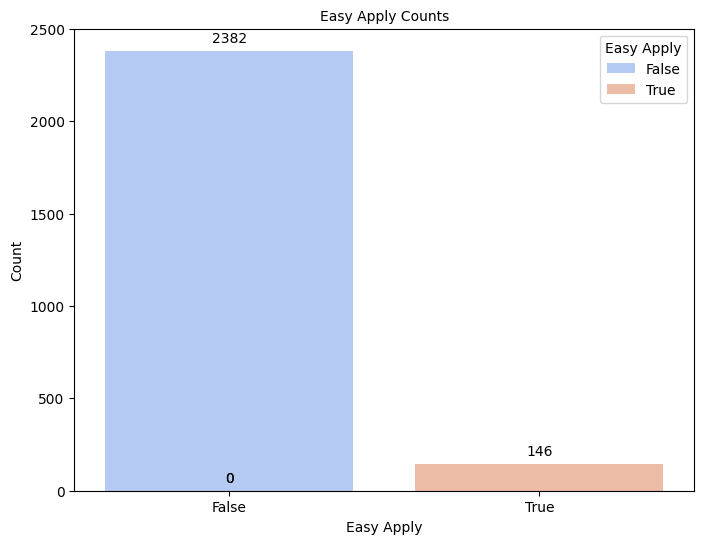

In [39]:
# Plotting
plt.figure(figsize=(8, 6))
splot = sns.countplot(x=data['Easy Apply'], hue=data['Easy Apply'], palette='coolwarm')

# Add legend
handles, labels = splot.get_legend_handles_labels()
splot.legend(handles, ['False', 'True'], title='Easy Apply')

# Add count values on top of the bars
for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center',
        va = 'center',
        xytext = (0, 9),
        textcoords = 'offset points'
    )

plt.xlabel('Easy Apply', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Easy Apply Counts', fontsize=10)
plt.show()

**Summary:** Only 146 jobs (5.8) are easy apply.

## Top 20 Job Titles
<a name="top-20-job-titles"></a>

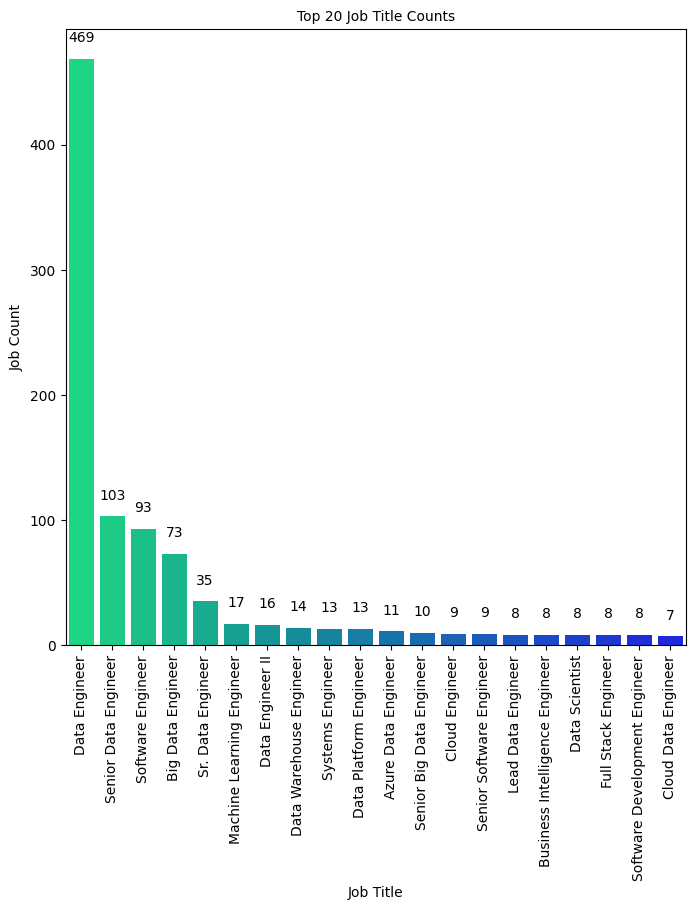

In [40]:
plt.subplots(figsize=(8, 8))
splot = sns.barplot(
    x=data['Job Title'].value_counts()[0:20].index,
    y=data['Job Title'].value_counts()[0:20],
    palette='winter_r',
    hue=data['Job Title'].value_counts()[0:20].index,
    legend=False
)

for p in splot.patches:
    splot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 15),
        textcoords='offset points'
    )

plt.xlabel('Job Title', fontsize=10)
plt.ylabel('Job Count', fontsize=10)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)
plt.title('Top 20 Job Title Counts', fontsize=10)
plt.show()

**Summary:** The Data Engineer role is the most frequently listed job title. This could indicate a high demand for data engineers in the job market. Other roles, while still in the top 20, show much lower counts, reflecting either lower demand or fewer listings for these positions.

## Top 20 Job Titles with Lower and Upper Salary Estimates
<a name="top-20-salary"></a>

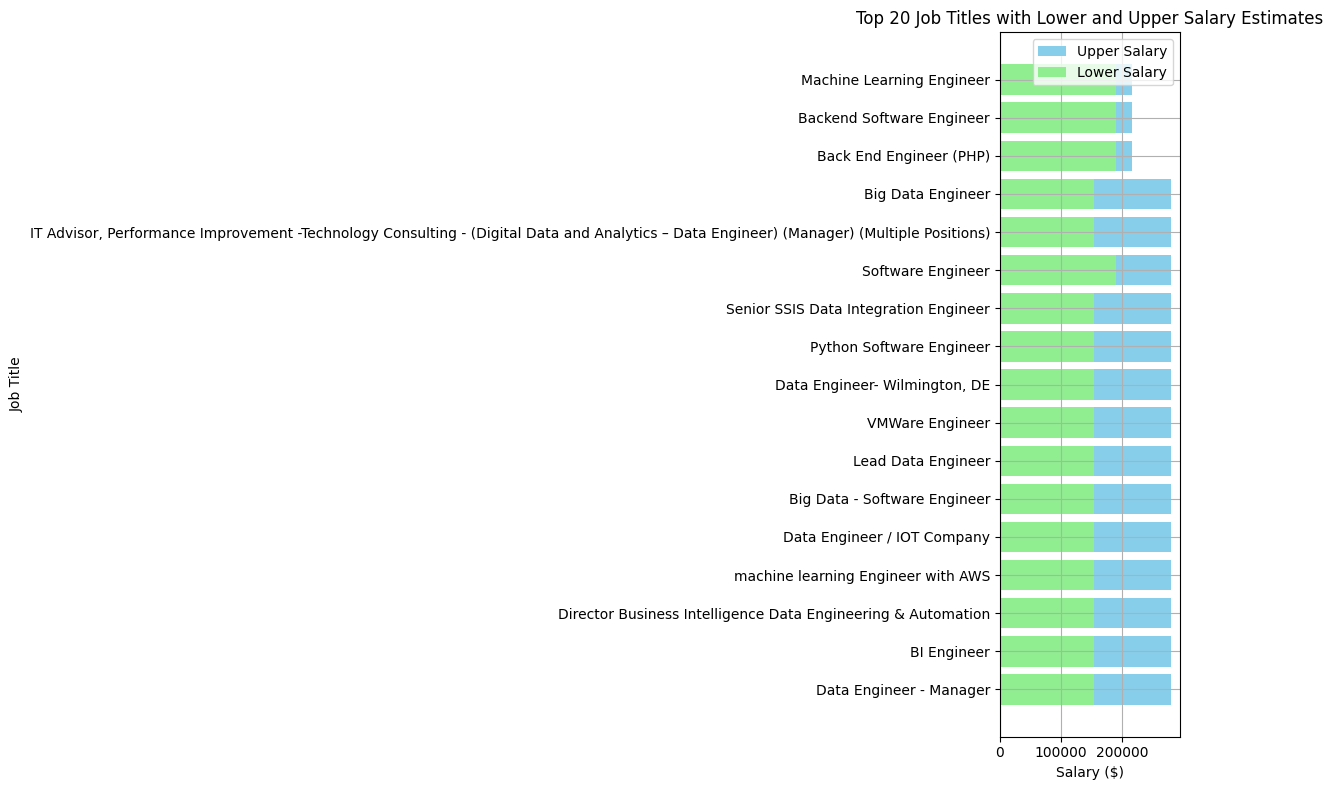

In [41]:
# Sort job titles by their upper salary (descending) for plotting
sorted_jobs = data.sort_values(by='Upper Salary', ascending=False).head(20)


# Plotting
plt.figure(figsize=(12, 8))
plt.barh(sorted_jobs['Job Title'], sorted_jobs['Upper Salary'], color='skyblue', label='Upper Salary')
plt.barh(sorted_jobs['Job Title'], sorted_jobs['Lower Salary'], color='lightgreen', label='Lower Salary')


plt.xlabel('Salary ($)')
plt.ylabel('Job Title')
plt.title('Top 20 Job Titles with Lower and Upper Salary Estimates')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

**Summary:** A higher lower salary for a job does not necessarily mean a higher upper salary, like machine learning egineer, backend software egineer.

## Company Size Vs. Salary
<a name="compay-size-salary"></a>

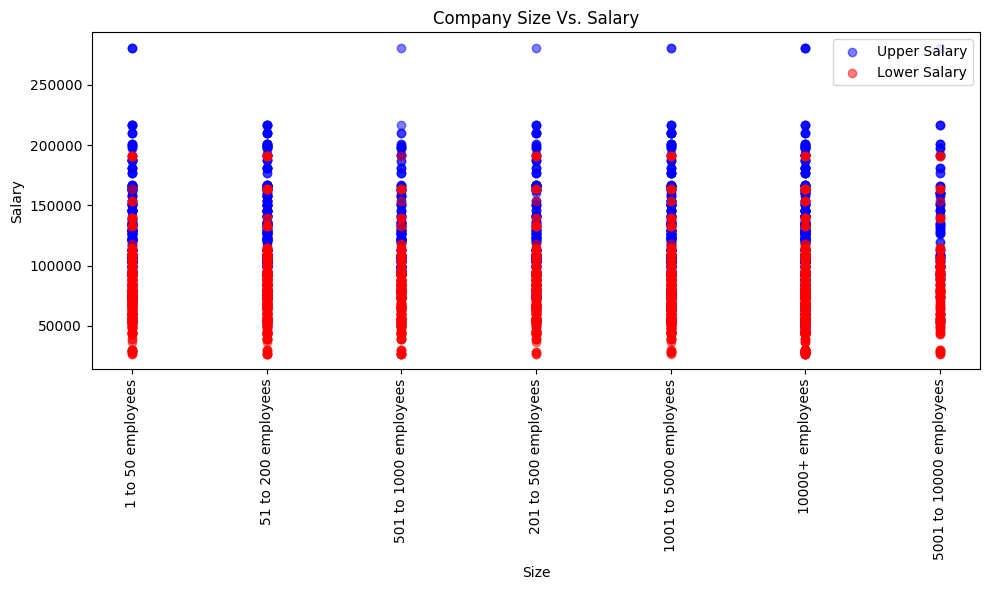

In [42]:
# Filter out rows where Size is -1 or 'unknown'
filtered_data = data[(data['Size'] != '-1') & (data['Size'].str.lower() != 'unknown')]

# Plotting the relationship
plt.figure(figsize=(10, 6))

# Plot Size vs Upper Salary
plt.scatter(filtered_data['Size'], filtered_data['Upper Salary'], color='blue', alpha=0.5, label='Upper Salary')

# Plot Size vs Lower Salary
plt.scatter(filtered_data['Size'], filtered_data['Lower Salary'], color='red', alpha=0.5, label='Lower Salary')

# Adding labels and title
plt.xlabel('Size')
plt.ylabel('Salary')
plt.title('Company Size Vs. Salary')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels if they are too long

plt.tight_layout()

**Summary:** There is no significant variation in salary estimates based on the size of the company. Both lower and upper salary estimates are dispersed within each company size category. it's suggesting that other factors might be influencing salary ranges more strongly than company size alone.

## Keywords of Job Titles
<a name="keywords-job-titles"></a>

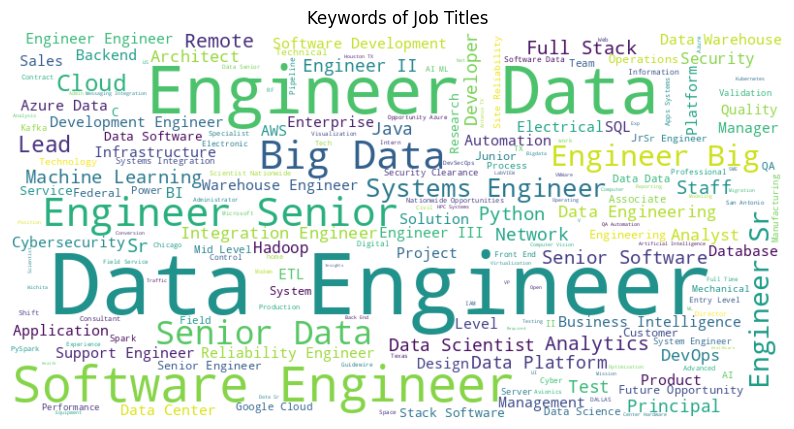

In [43]:
# Join all job titles into a single string for word cloud generation
text = " ".join(data['Job Title'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keywords of Job Titles')
plt.show()

**Summary:** The most prominent job titles are "Data Engineer," "Engineer," "Software Engineer," "Senior," and "Data." Other significant titles include "Big Data," "Systems Engineer," "Principal," "Full Stack," "Reliability Engineer," and "Machine Learning." This indicates a strong focus on engineering roles, particularly in data and software, with various levels of seniority and specialization.


## Keywords of Job Description
<a name="keywords-job-description"></a>

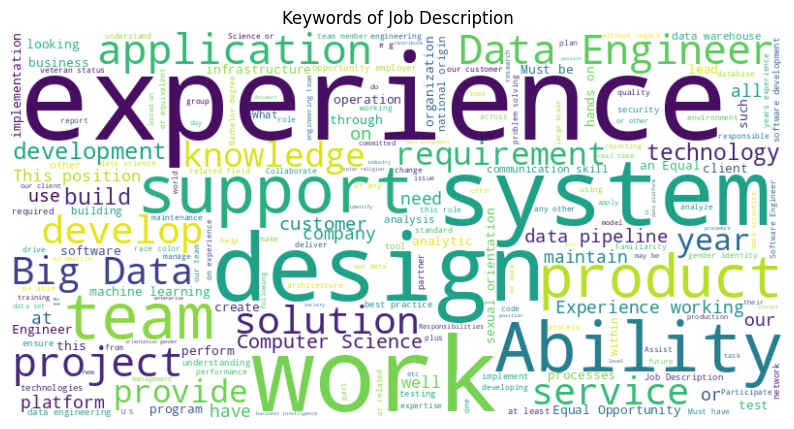

In [44]:
# Join all job titles into a single string for word cloud generation
text = " ".join(data['Job Description'])

# Generate word cloud
stop_word = ['Company Description','Key Responsibilities', 'Overview', 'Job description', 'Position Overview',
             'Who we are', 'About Us', 'About the Position', 'Company Profile','Auto req ID', 'About TelTech',
             'About the Team','about', 'we','are','as','a','it','is','you','will', 'including',
             'and','to','with','the','in','for','of']

wordcloud = WordCloud(stopwords=stop_word,width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keywords of Job Description')
plt.show()

**Summary:** The most prominent words, indicating their higher frequency or importance in the job description, are "experience," "design," "work," "system," "support," and "team." Other notable keywords include "product," "solution," "ability," "application," "service," and "project." This suggests that the job likely emphasizes experience in system design, teamwork, and providing support, among other responsibilities.